# Model Tuning / Model Doğrulama

In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn import model_selection
import matplotlib.pyplot as plt

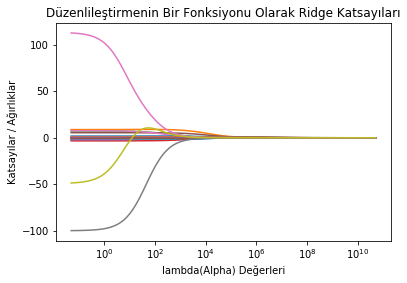

In [5]:
hit = pd.read_csv("Hitters.csv")

df = hit.copy()

df = df.dropna()

dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])

y = df["Salary"]

X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64")

X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

lambdalar = 10 ** np.linspace(10, -2, 100) * 5

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_)
    
ax = plt.gca()
ax.plot(lambdalar, katsayilar)
ax.set_xscale("log")

plt.xlabel("lambda(Alpha) Değerleri")
plt.ylabel("Katsayılar / Ağırlıklar")
plt.title("Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları");

In [6]:
y_pred_train = ridge_model.predict(X_train)

y_pred_test = ridge_model.predict(X_test)

In [7]:
ridge_cv = RidgeCV(alphas = lambdalar, scoring = "neg_mean_squared_error", normalize = True)

In [8]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+10, 3.78231664e+10, 2.86118383e+10, 2.16438064e+10,
       1.63727458e+10, 1.23853818e+10, 9.36908711e+09, 7.08737081e+09,
       5.36133611e+09, 4.05565415e+09, 3.06795364e+09, 2.32079442e+09,
       1.75559587e+09, 1.32804389e+09, 1.00461650e+09, 7.59955541e+08,
       5.74878498e+08, 4.34874501e+08, 3.28966612e+08, 2.48851178e+08,
       1.88246790e+08, 1.42401793e+0...
       3.28966612e+00, 2.48851178e+00, 1.88246790e+00, 1.42401793e+00,
       1.07721735e+00, 8.14875417e-01, 6.16423370e-01, 4.66301673e-01,
       3.52740116e-01, 2.66834962e-01, 2.01850863e-01, 1.52692775e-01,
       1.15506485e-01, 8.73764200e-02, 6.60970574e-02, 5.00000000e-02]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [23]:
ridge_cv.alpha_  # eğitim seti için elimizdeki en optimum lambda değeri

0.6164233697210317

In [24]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_, normalize = True).fit(X_train, y_train)

## eğitim seti için bulunan optimum hata;

In [25]:
np.sqrt(mean_squared_error(y_train, ridge_tuned.predict(X_train)))

308.5165374750505

In [26]:
r2_score(y_train, ridge_tuned.predict(X_train))

0.5190446520271665

## test seti için bulunan optimum hata;

In [29]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

386.21231390701064

In [30]:
r2_score(y_test, ridge_tuned.predict(X_test))

0.3109626080076173